In [1]:
from scipy.stats import norm
import numpy as np
import seaborn as sns

In [15]:
p = 0.48
N = 1000

X = np.random.binomial(1, p, N)

p_hat = X.mean() # Our estimate
se_hat = np.sqrt(p_hat * (1 - p_hat) / N) # The standard deviation of our estimate
std = X.std() # The standard deviation of the samples

print(p_hat)

print(norm.cdf(0.01/se_hat) - norm.cdf(-0.01/se_hat))

0.472
0.47355989090605327


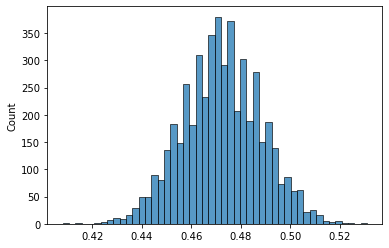

In [16]:
# do the bootstrap

import random

n_boots = 5000
boot_means = []

for i_boot in range(n_boots):
    boot_means.append(np.mean(random.choices(X, k=N)))

boot_means = np.array(boot_means)

# search for the symmetric 95% confidence interval 
# (starting from the other direction might be faster...)

mass = 0
pm = 0
delta = 0.001

while mass < 0.95:
    mass = ((boot_means >= p_hat - pm) & (boot_means < p_hat + pm)).sum() / n_boots
    pm += delta
    
    
sns.histplot(boot_means)

In [17]:
print("Normal approximation : p_hat = %0.4f ± %0.4f" % (p_hat, 1.96*se))
print("Bootstrap            : p_hat = %0.4f ± %0.4f" % (p_hat, pm))
print("Relative difference  : %0.5f%%" % ((pm - 2*se) / (2*se) * 100))


Normal approximation : p_hat = 0.4720 ± 0.0310
Bootstrap            : p_hat = 0.4720 ± 0.0330
Relative difference  : 4.35850%


That is very interesting! Here the bootstrap is totally clueless that the underlying model is the binomial distribution. If we know that we can also first estimate the standard error of the mean estimate by bootstrap:

In [18]:
print("The theory (CLT approximation) suggests that se = %0.5f" % se)
print("The bootstrap estimate of the standard error    = %0.5f" % boot_means.std())

The theory (CLT approximation) suggests that se = 0.01581
The bootstrap estimate of the standard error    = 0.01585


In [78]:
# note: those are all for the mean estimates!